 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
#read data:
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)


#sort by index:
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)

# Validate nulls have been dropped
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
# read data
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

#sort by index:
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)

#validate nulls have been dropped
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
# read data:
sp_tsx_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx = pd.read_csv(sp_tsx_csv, index_col="Date", infer_datetime_format=True, parse_dates = True)

#sort by index:
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx.dtypes
sp_tsx['Close'] = sp_tsx['Close'].str.replace("$","")
sp_tsx['Close'] = sp_tsx['Close'].str.replace(",","")
sp_tsx['Close']

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [10]:
sp_tsx.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx['Close'] = sp_tsx['Close'].astype(float)
sp_tsx['Close']

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [12]:
# Calculate Daily Returns
sp_tsx = sp_tsx.pct_change()
sp_tsx.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp_tsx.dropna(inplace=True)
sp_tsx

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx = sp_tsx.rename(columns = {"Close":"S&P TSX 60"})
sp_tsx.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_whale_algo_sptsx = pd.concat([whale_returns, algo_returns,sp_tsx], axis="columns", join="inner")
combined_whale_algo_sptsx.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

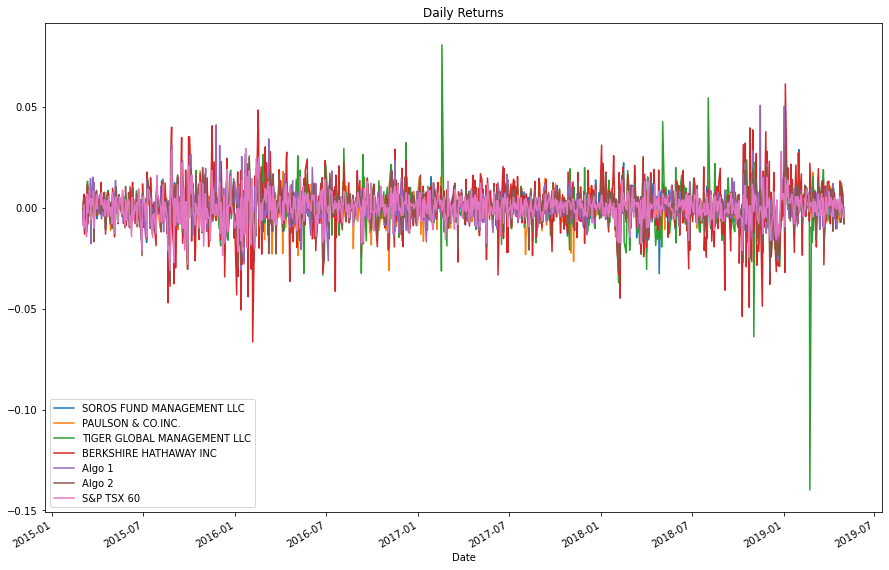

In [16]:
# Plot daily returns of all portfolios
combined_whale_algo_sptsx.plot(figsize=(15,10), title = "Daily Returns")


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

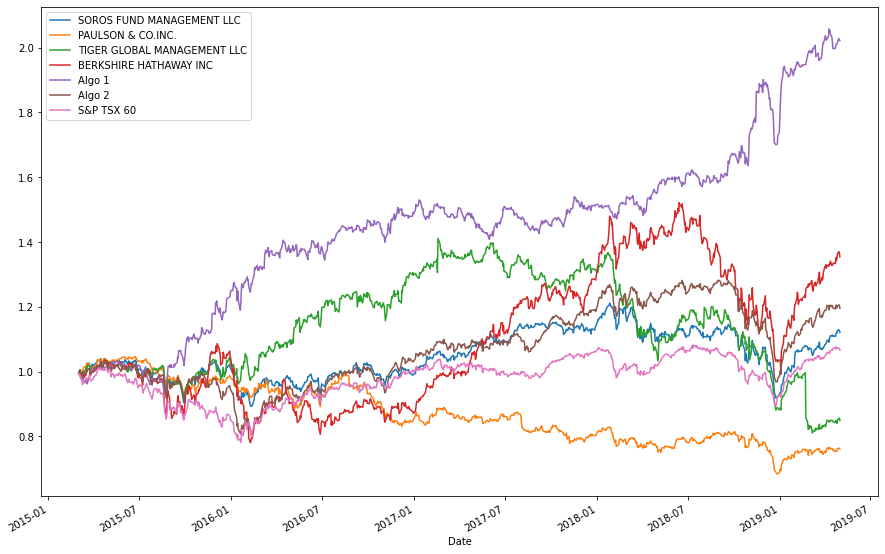

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_whale_algo_sptsx).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

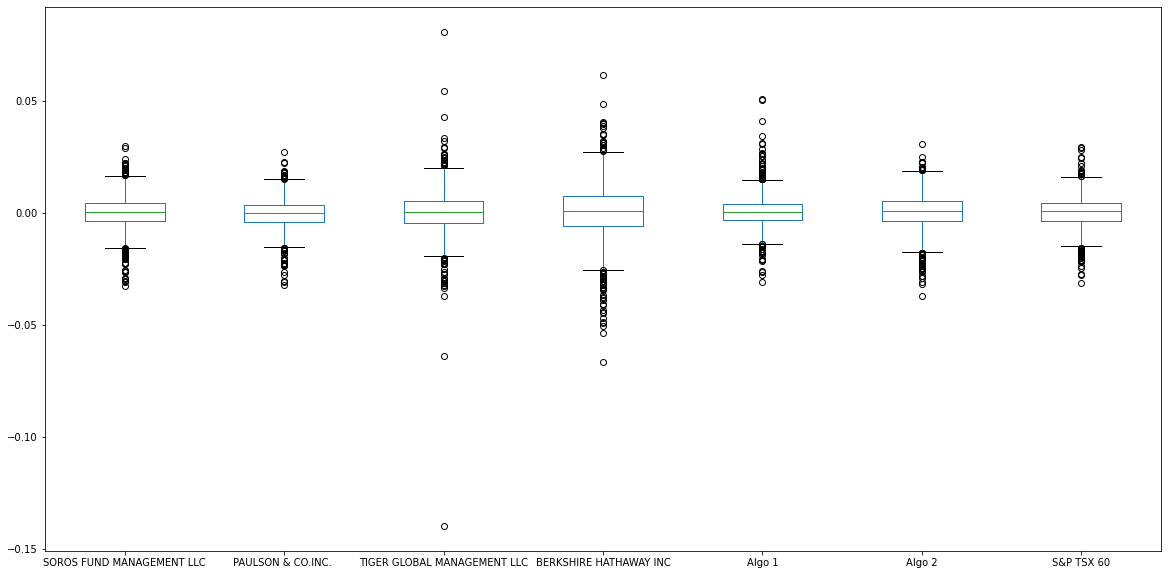

In [18]:
# Box plot to visually show risk
combined_whale_algo_sptsx.boxplot(figsize = (20,10), grid = False)

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_whale_algo_sptsx_std = combined_whale_algo_sptsx.std()
combined_whale_algo_sptsx_std.sort_values(inplace=True)
combined_whale_algo_sptsx_std

PAULSON & CO.INC.              0.006982
S&P TSX 60                     0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate the daily standard deviation of S&P TSX 60
daily_sptsx_std = sp_tsx.std()
daily_sptsx_std.head()

# Determine which portfolios are riskier than the S&P TSX 60
combined_whale_algo_sptsx_std > combined_whale_algo_sptsx_std['S&P TSX 60']


PAULSON & CO.INC.              False
S&P TSX 60                     False
Algo 1                          True
SOROS FUND MANAGEMENT LLC       True
Algo 2                          True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_whale_algo_sptsx.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

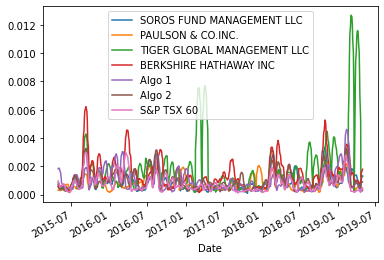

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
grp_rolling = combined_whale_algo_sptsx.rolling(window=21).std()

# Plot the rolling standard deviation
grp_rolling.rolling(window=21).std().plot()


### Calculate and plot the correlation

<AxesSubplot:>

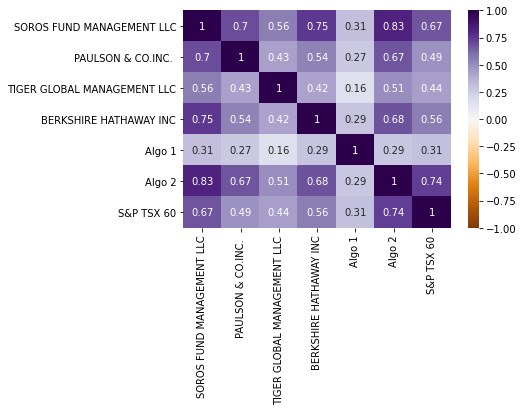

In [23]:
# Calculate the correlation
import seaborn as sns
correlation = combined_whale_algo_sptsx.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1, annot=True, cmap="PuOr")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

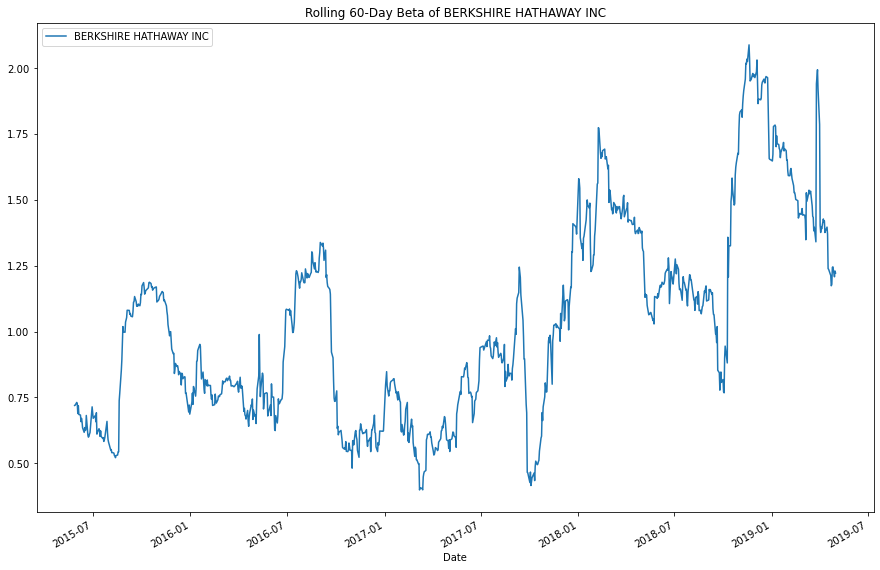

In [24]:
# Calculate covariance of a single portfolio
rolling_BRK_covariance = combined_whale_algo_sptsx['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_whale_algo_sptsx['S&P TSX 60'])

# Calculate variance of S&P TSX
rolling_variance = combined_whale_algo_sptsx['S&P TSX 60'].rolling(window=60).var()


# Computing beta
rolling_BRK_beta = rolling_BRK_covariance / rolling_variance

# Plot beta trend
ax = rolling_BRK_beta.plot(figsize=(15,10), title="Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC")

ax.legend(["BERKSHIRE HATHAWAY INC"])

In [25]:
## Rolling Statistics Challenge: Exponentially Weighted Average 
# An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.


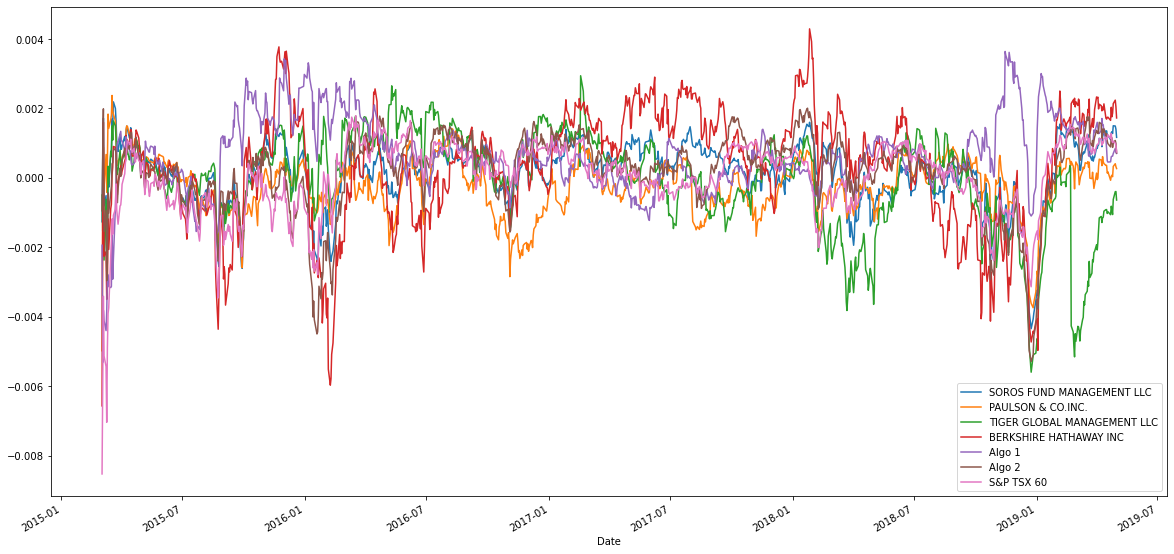

In [26]:
# Use `ewm` to calculate the rolling window

ewm = combined_whale_algo_sptsx.ewm(halflife = 21).mean().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_whale_algo_sptsx.mean() * 252) / (combined_whale_algo_sptsx.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:>

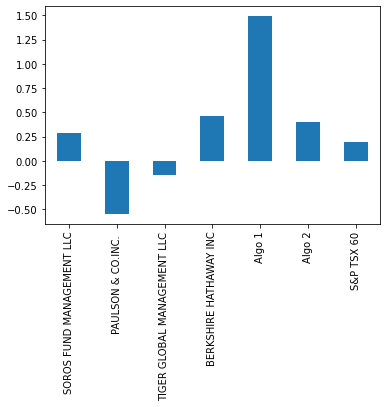

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

In [ ]:
##The algorithmic strategies have outperformed most of the whale returns as well as S&P TSX 60.
##Algo 1 has performed exceptionally well. Sharpe Ratio of just under 1.5 which is the best performed portfolio among all the other portfolios.
##Algo 2 has also performed considerably well. Even though it could not beat BERKSHIRE HATHAWAY INC it has outperformed the rest of the whale returns and S&P TSX 60.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [29]:
# Reading data from 1st stock
SHOP_data = Path("Resources/shop_historical.csv")
SHOP_df = pd.read_csv(SHOP_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
SHOP_df.drop(columns= "Symbol", inplace = True)
SHOP_df.head()

,Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [30]:
# Reading data from 2nd stock
OTEX_data = Path("Resources/otex_historical.csv")
OTEX_df = pd.read_csv(OTEX_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
OTEX_df.drop(columns= "Symbol", inplace = True)
OTEX_df.head()

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [31]:
# Reading data from 3rd stock
L_data = Path("Resources/l_historical.csv")
L_df = pd.read_csv(L_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
L_df.drop(columns= "Symbol", inplace = True)
L_df.head()

,Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [32]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([SHOP_df, OTEX_df, L_df], axis = 'columns', join = 'inner' )
combined_df.head()



,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [33]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [34]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ["SHOP","OTEX","L"]
combined_df

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [35]:
# Calculate daily returns
combined_daily_returns = combined_df.pct_change()
combined_daily_returns

# Drop NAs
combined_daily_returns.dropna()


# Display sample data
combined_daily_returns.sample(10)


,SHOP,OTEX,L
Date,,,
2018-10-01,-0.015356,-0.015666,-0.017469
2019-04-01,-0.005365,-0.000585,0.000607
2018-03-01,-0.010592,-0.012431,-0.013637
2018-01-30,-0.024606,-0.001900,-0.031613
2019-08-02,-0.027968,-0.088387,-0.002030
2018-11-28,0.036296,0.012798,-0.008834
2018-01-16,-0.025700,-0.001196,0.001220
2019-08-12,-0.005488,0.000394,0.002695
2018-08-22,0.026677,-0.005775,-0.010488


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_daily_returns = combined_daily_returns.dot(weights)


# Display sample data
combined_daily_returns.sample(10)


Date
2018-12-17   -0.029922
2018-03-12    0.002223
2018-12-04   -0.017139
2019-03-06    0.004904
2019-03-13    0.000521
2019-07-29   -0.015619
2019-11-13    0.019058
2019-09-12    0.009100
2019-02-15    0.001511
2019-05-06    0.006045
dtype: float64

<AxesSubplot:xlabel='Date'>

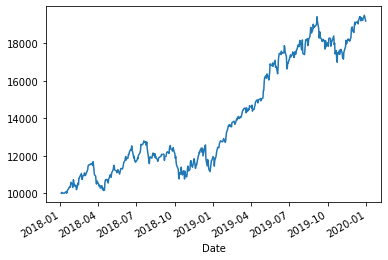

In [57]:
##If initially invested $10,000 would have made approx. $9,180 return in two years.
initial_investment = 10000

#Use the 'cumplod' function to calculate cumlative returns
cumulative_returns = (1 + combined_daily_returns).cumprod()
 
#Compute cumulative returns
cumulative_profit = initial_investment * cumulative_returns

#Plot the returns of the investment
cumulative_profit.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
join_combined_df = pd.concat([combined_daily_returns, combined_whale_algo_sptsx], axis = 'columns', join = 'inner')
join_combined_df.rename(columns = {0:'SHOP, OTEX, L'}, inplace = True)

# Only compare dates where return data exists for all the stocks (drop NaNs)
join_combined_df.dropna(inplace = True)
join_combined_df.isna().sum()
join_combined_df.head()


,"SHOP, OTEX, L",SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
join_combined_std = join_combined_df.std()
join_combined_std.sort_values(inplace=True)
annualized_std = join_combined_df.std() * np.sqrt(252)
annualized_std

SHOP, OTEX, L                  0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX 60                     0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

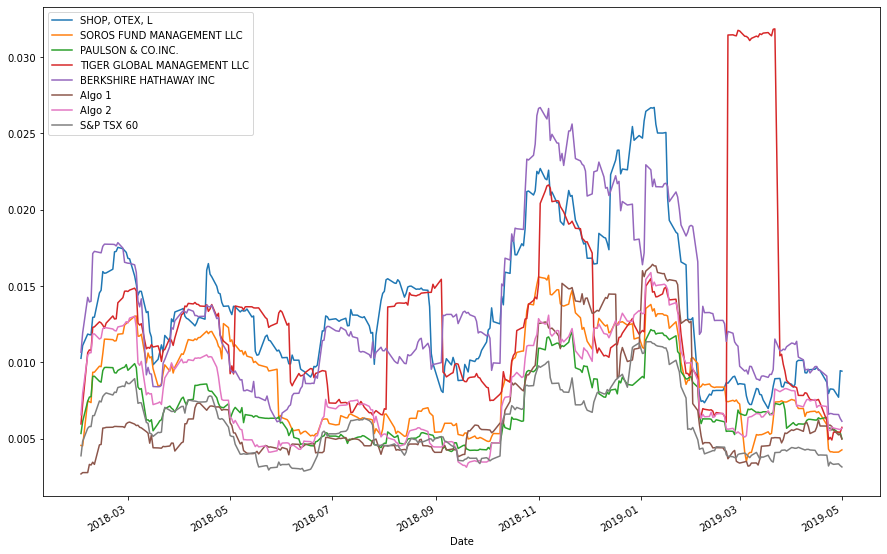

In [39]:
# Calculate rolling standard deviation
join_combined_rolling = join_combined_df.rolling(window=21).std()

# Plot rolling standard deviation
join_combined_rolling.plot(figsize = (15,10))


### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
correlation = join_combined_df.corr()
correlation


,"SHOP, OTEX, L",SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
"SHOP, OTEX, L",1.000000,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228
SOROS FUND MANAGEMENT LLC,0.556093,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.385305,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.303971,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.647413,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817
Algo 1,0.214770,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789
Algo 2,0.563756,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326
S&P TSX 60,0.579228,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000


<AxesSubplot:>

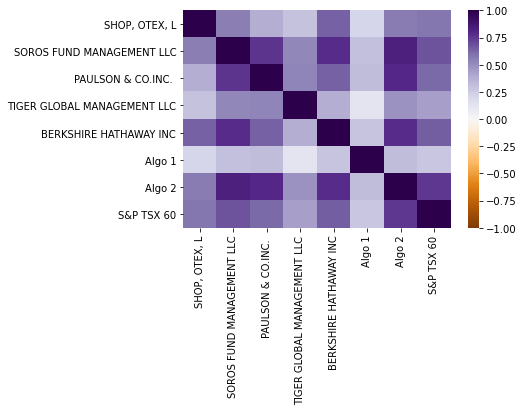

In [48]:
sns.heatmap(correlation, vmin=-1, vmax=1,cmap="PuOr")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

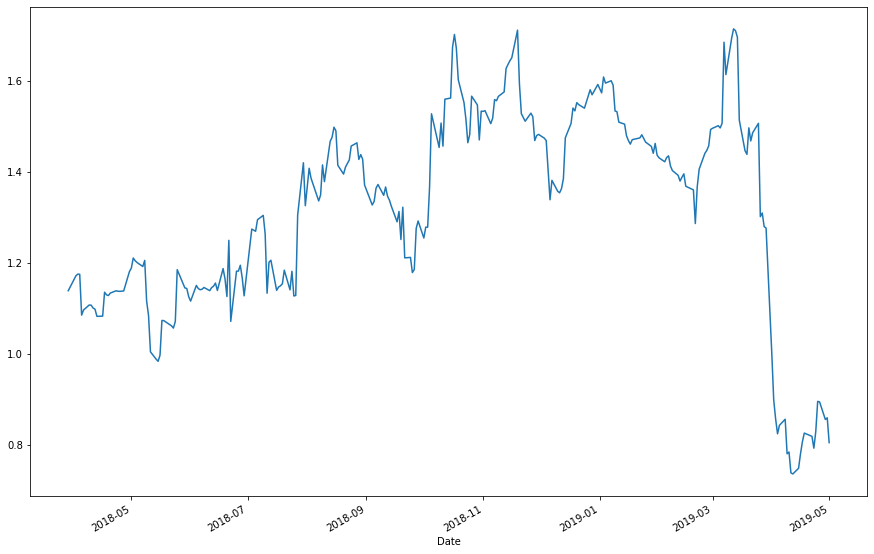

In [41]:
# Calculate and plot Beta
join_combined_rolling_covariance = join_combined_df['SHOP, OTEX, L'].rolling(window = 60).cov(join_combined_df['S&P TSX 60'])
join_combined_rolling_variance = join_combined_df['S&P TSX 60'].rolling(window = 60).var()
join_combined_beta = join_combined_rolling_covariance / join_combined_rolling_variance

join_combined_beta.plot(figsize = (15,10)) 


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
join_combined_sharpe_ratios = (join_combined_df.mean() * 252) / (join_combined_df.std() * np.sqrt(252))
join_combined_sharpe_ratios

SHOP, OTEX, L                  1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
dtype: float64

<AxesSubplot:>

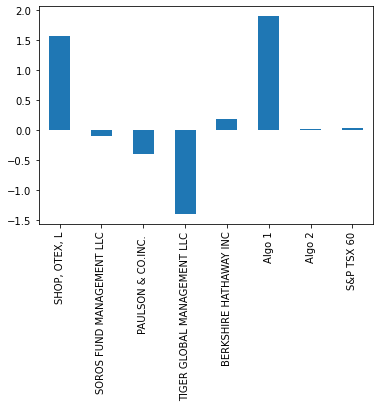

In [43]:
# Visualize the sharpe ratios as a bar plot
join_combined_sharpe_ratios.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

In [ ]:
## Algo1 performed the best with least correlation among all the portfolios and highest sharpe ratio of 1.9.

##My portfolio performed quite well compared to S&P TSX 60 & whale returns. 
##Since two third of my portfolio is made up of high tech companies, it can be seen from the rolling beta that it is more volatile than S&P TSX 60. 
##Keeping above 1 for most of the period until Apr 19  
##Sharpe ratio 1.56 shows that my portfolio is the second best portfolio after Algo 1 in terms of the risk taken on the investment.

##My portfolio return in $value

##$10,000 investment on my portfolio would have made $11953.45, ROE of 19.53% at the end of 2018,
##and $19179.96, ROE of 91.8% by the end of 2019 which means that the majority of the return were produced during 2019.
##2019 had been a good year for most of the portfolios however apart from Algo 1 and my portfolio, many of the portfolio performed poorly during
##2018 especially towards the end of the year. 
##Overrall the most of my portfolio return come from the rapid growth of a particular 
##stock 'SHOPIFY' so choosing a wrong stock would have made a completely differenct return. Shopify stock value increased 3.9 times from $132.06 
##at the beginning of 2018 to $517.79 at the end of 2019. That is 3.9 times the value. Initial investment of $3333 would have become over $13000+.
